Noisy porosity profile: 
 [0.56       0.55559518 0.55123523 0.54691915 0.54264588 0.5384144
 0.53422369 0.5300727  0.52596042 0.5218858  0.51784782 0.51384545
 0.50987766 0.50594341 0.50204168 0.49817143 0.49433164 0.49052127
 0.48673929 0.48298468 0.4792564  0.47555342 0.47187471 0.46821925
 0.46458599 0.46097391 0.45738198 0.45380917 0.45025444 0.44671677
 0.44319513 0.43968848 0.4361958  0.43271605 0.4292482  0.42579123
 0.4223441  0.41890578 0.41547525 0.41205146 0.40863338 0.40521931
 0.40180674 0.39839308 0.39497577 0.39155222 0.38811986 0.38467611
 0.38121839 0.37774414 0.37425076 0.37073569 0.36719636 0.36363017
 0.36003456 0.35640695 0.35274476 0.34904542 0.34530635 0.34152497
 0.33769894 0.33382921 0.32991935 0.32597295 0.32199363 0.31798498
 0.31395062 0.30989415 0.30581918 0.30172932 0.29762818 0.29351936
 0.28940646 0.2852931  0.28118289 0.27707943 0.27298632 0.26890718
 0.26484561 0.26080522 0.25678962 0.2528024  0.24884719 0.24492759
 0.2410472  0.23720964 0.2334185  0.2

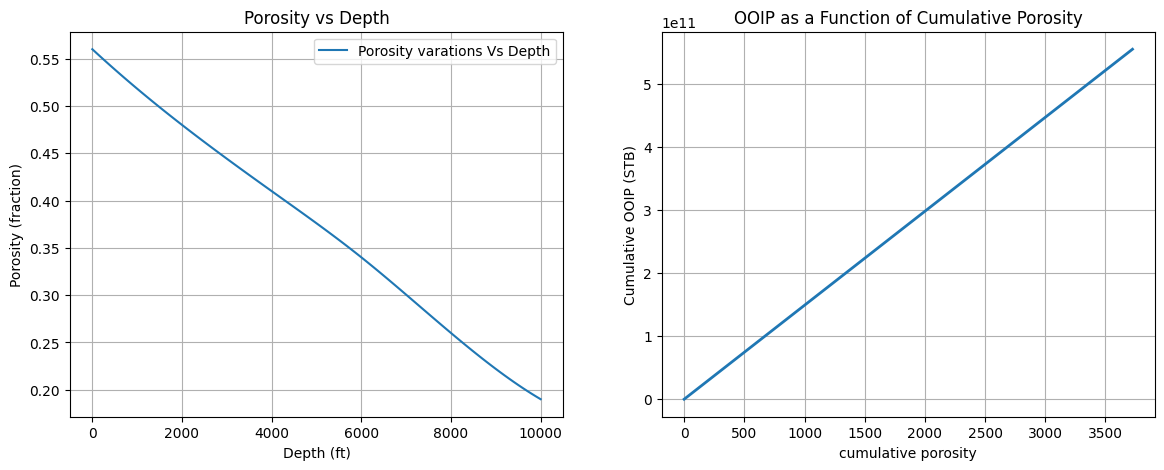

<Figure size 640x480 with 0 Axes>

In [ ]:
#GOAL: Estimating the Original Oil In Place (OOIP) from reservoir properties and analyzing the effect of porosity varation on OOIP.
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.integrate import cumulative_trapezoid

#RESERVOIR PARAMETERS
A = 640 #Acres, area
h = 50 #ft, thickness
S_w = 0.25 #water saturation
B_o = 1.25 # FVF

#Defining the depth of the reservoir
depth = np.linspace(0,10000,100)

#Assigning porosity profile as a non-linear synthetic function
depth_points = np.array([0,2000,4000,6000,8000,10000])
porosity_points = np.array([0.56,0.48,0.41,0.34,0.26,0.19])

#Using CubicSpline to interpolate values
cs = CubicSpline(depth_points,porosity_points)
porosity_profile = cs(depth)

#Adding noise to the porosity profile values to simulate real reservoir scenarios
np.random.seed(50)
noise = np.random.normal(loc=0, scale=0, size=porosity_profile.shape)
noisy_porosity_profile = porosity_profile + noise
print("Noisy porosity profile: \n",noisy_porosity_profile)

#Calculating the integrated porosity over the depth interval orr using the Mean method
cumulative_porosity = cumulative_trapezoid(noisy_porosity_profile,depth,initial=0)

#Calculating the OOIP using interpolated noisy porosity values
OOIP = 7758*A*h*cumulative_porosity*(1-S_w)/B_o
print(f"The Original Oil in Place at different porosity intervals are: \n",OOIP,"STB")

Cumulative_OOIP = OOIP[-1]
print(f"The Original Oil In Place in the reservoir is: {Cumulative_OOIP:,.3f} STB")

#VISUALIZATION
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation,PillowWriter

fig,axs = plt.subplots(1,2, figsize = (14,5))
axs[0].plot(depth, noisy_porosity_profile,label="Porosity varations Vs Depth")
axs[0].set_xlabel("Depth (ft)")
axs[0].set_ylabel("Porosity (fraction)")
axs[0].set_title("Porosity vs Depth")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(cumulative_porosity, OOIP, lw=2)
axs[1].set_xlabel("cumulative porosity")
axs[1].set_ylabel("Cumulative OOIP (STB)")
axs[1].set_title("OOIP as a Function of Cumulative Porosity")
axs[1].grid(True)

plt.show()
plt.tight_layout()



















